# Dependency of PTSD level from the daily stress level.

Based on the Daily Stress processing we are of opinion that *Daily Stress level* is an **interval** variable.
Based on a processing method described at "SCORING PART 5 –TRAUMA SYMPTOMS DSM-V" we are of opinion that *PTSD level* is an **interval** variable too.
It allows us ...




In [1]:
from matplotlib.pyplot import hist, xlabel, ylabel, figure, bar_label, scatter, title, xlim
from matplotlib import pyplot as plt
# Imports
from pandas import DataFrame, read_excel, options
from os.path import expanduser, join

from scipy.stats import f
from seaborn import heatmap, set_style, color_palette, lmplot, distplot, displot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

In [2]:
# Gather Data
io: str = join(expanduser('~'), "Documents", "Data_Emigrant Study and APA.xlsx")
outcome: DataFrame    = read_excel(io=io, sheet_name='PTSD', header=0, index_col=0, usecols="A,GW", skiprows=[1])
predictors: DataFrame = read_excel(io=io,
                                   sheet_name='daily stressors',
                                   header=0,
                                   index_col=0,
                                   usecols="A, AV, AZ, BD, BH, BL, BP, BT, BX, CB, CF, CJ, CN, CR, CV, CZ, DD, DH, DL, DP, DT, DX, EB, EF, EJ, EN, ER, EV, EZ, FD, FH, FL",
                                   skiprows=[1])

In [3]:
predictors.columns

Index(['Я не доверяю людям в этой стране. / I do not trust the people of this country.',
       'Я скучаю по атмосфере моего родного города (села). / I miss the atmosphere of my hometown.',
       'Социум постоянно напоминает мне, что я иммигрант. / Society constantly reminds you that you are an immigrant.',
       'Я чувствую себя одиноким. /  I feel alone.',
       'У меня слишком много обязанностей. / I have too many responsibilities.',
       'Меня беспокоит, что я не смогу дать моим детям образование, которое будет соответствовать моей культуре. / It worries me that I cannot educate my children according to my culture.',
       'Я чувствую, что я потерпел неудачу. / I feel that I have failed.',
       'Я чувствую, что я не принадлежу к этому обществу. / I feel that I do not belong to this society.',
       'Я боюсь, что я потерплю неудачу в этой стране. /  I fear that I will fail in this country.',
       'Я не чувствую себя здесь принятым. / I do not feel accepted here.',
       

In [4]:
outcome.describe()

,PTSD
count,65.000000
mean,1.895385
std,0.560388
min,1.080000
25%,1.560000
50%,1.760000
75%,2.320000
max,3.280000


# Data visualization

[Text(0, 0, '9'),
 Text(0, 0, '6'),
 Text(0, 0, '17'),
 Text(0, 0, '9'),
 Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '1')]

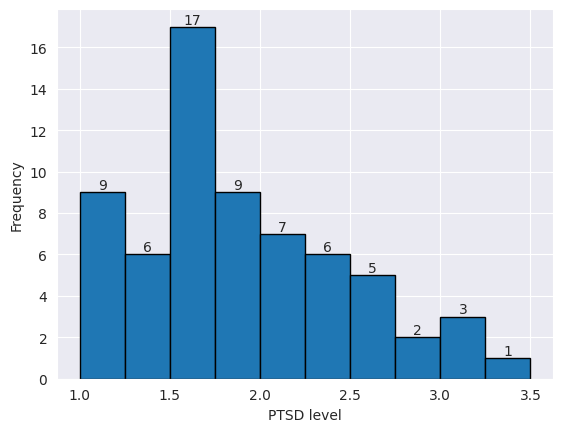

In [5]:
values, bins, bars = hist(outcome['PTSD'], ec='black', bins=10, range=(1, 3.5))
xlabel('PTSD level')
ylabel('Frequency')
bar_label(bars)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


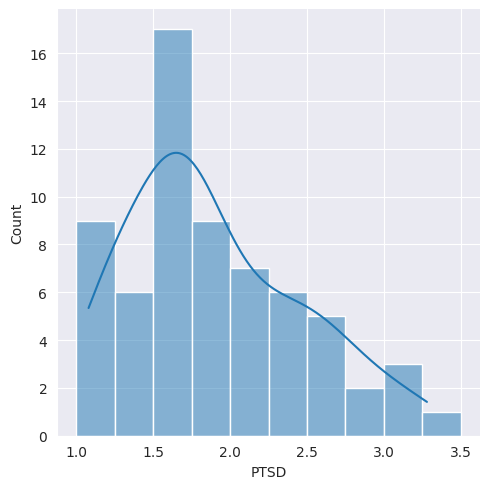

In [6]:
displot(outcome['PTSD'], bins=10, kde=True, binrange=(1, 3.5))

<Axes: >

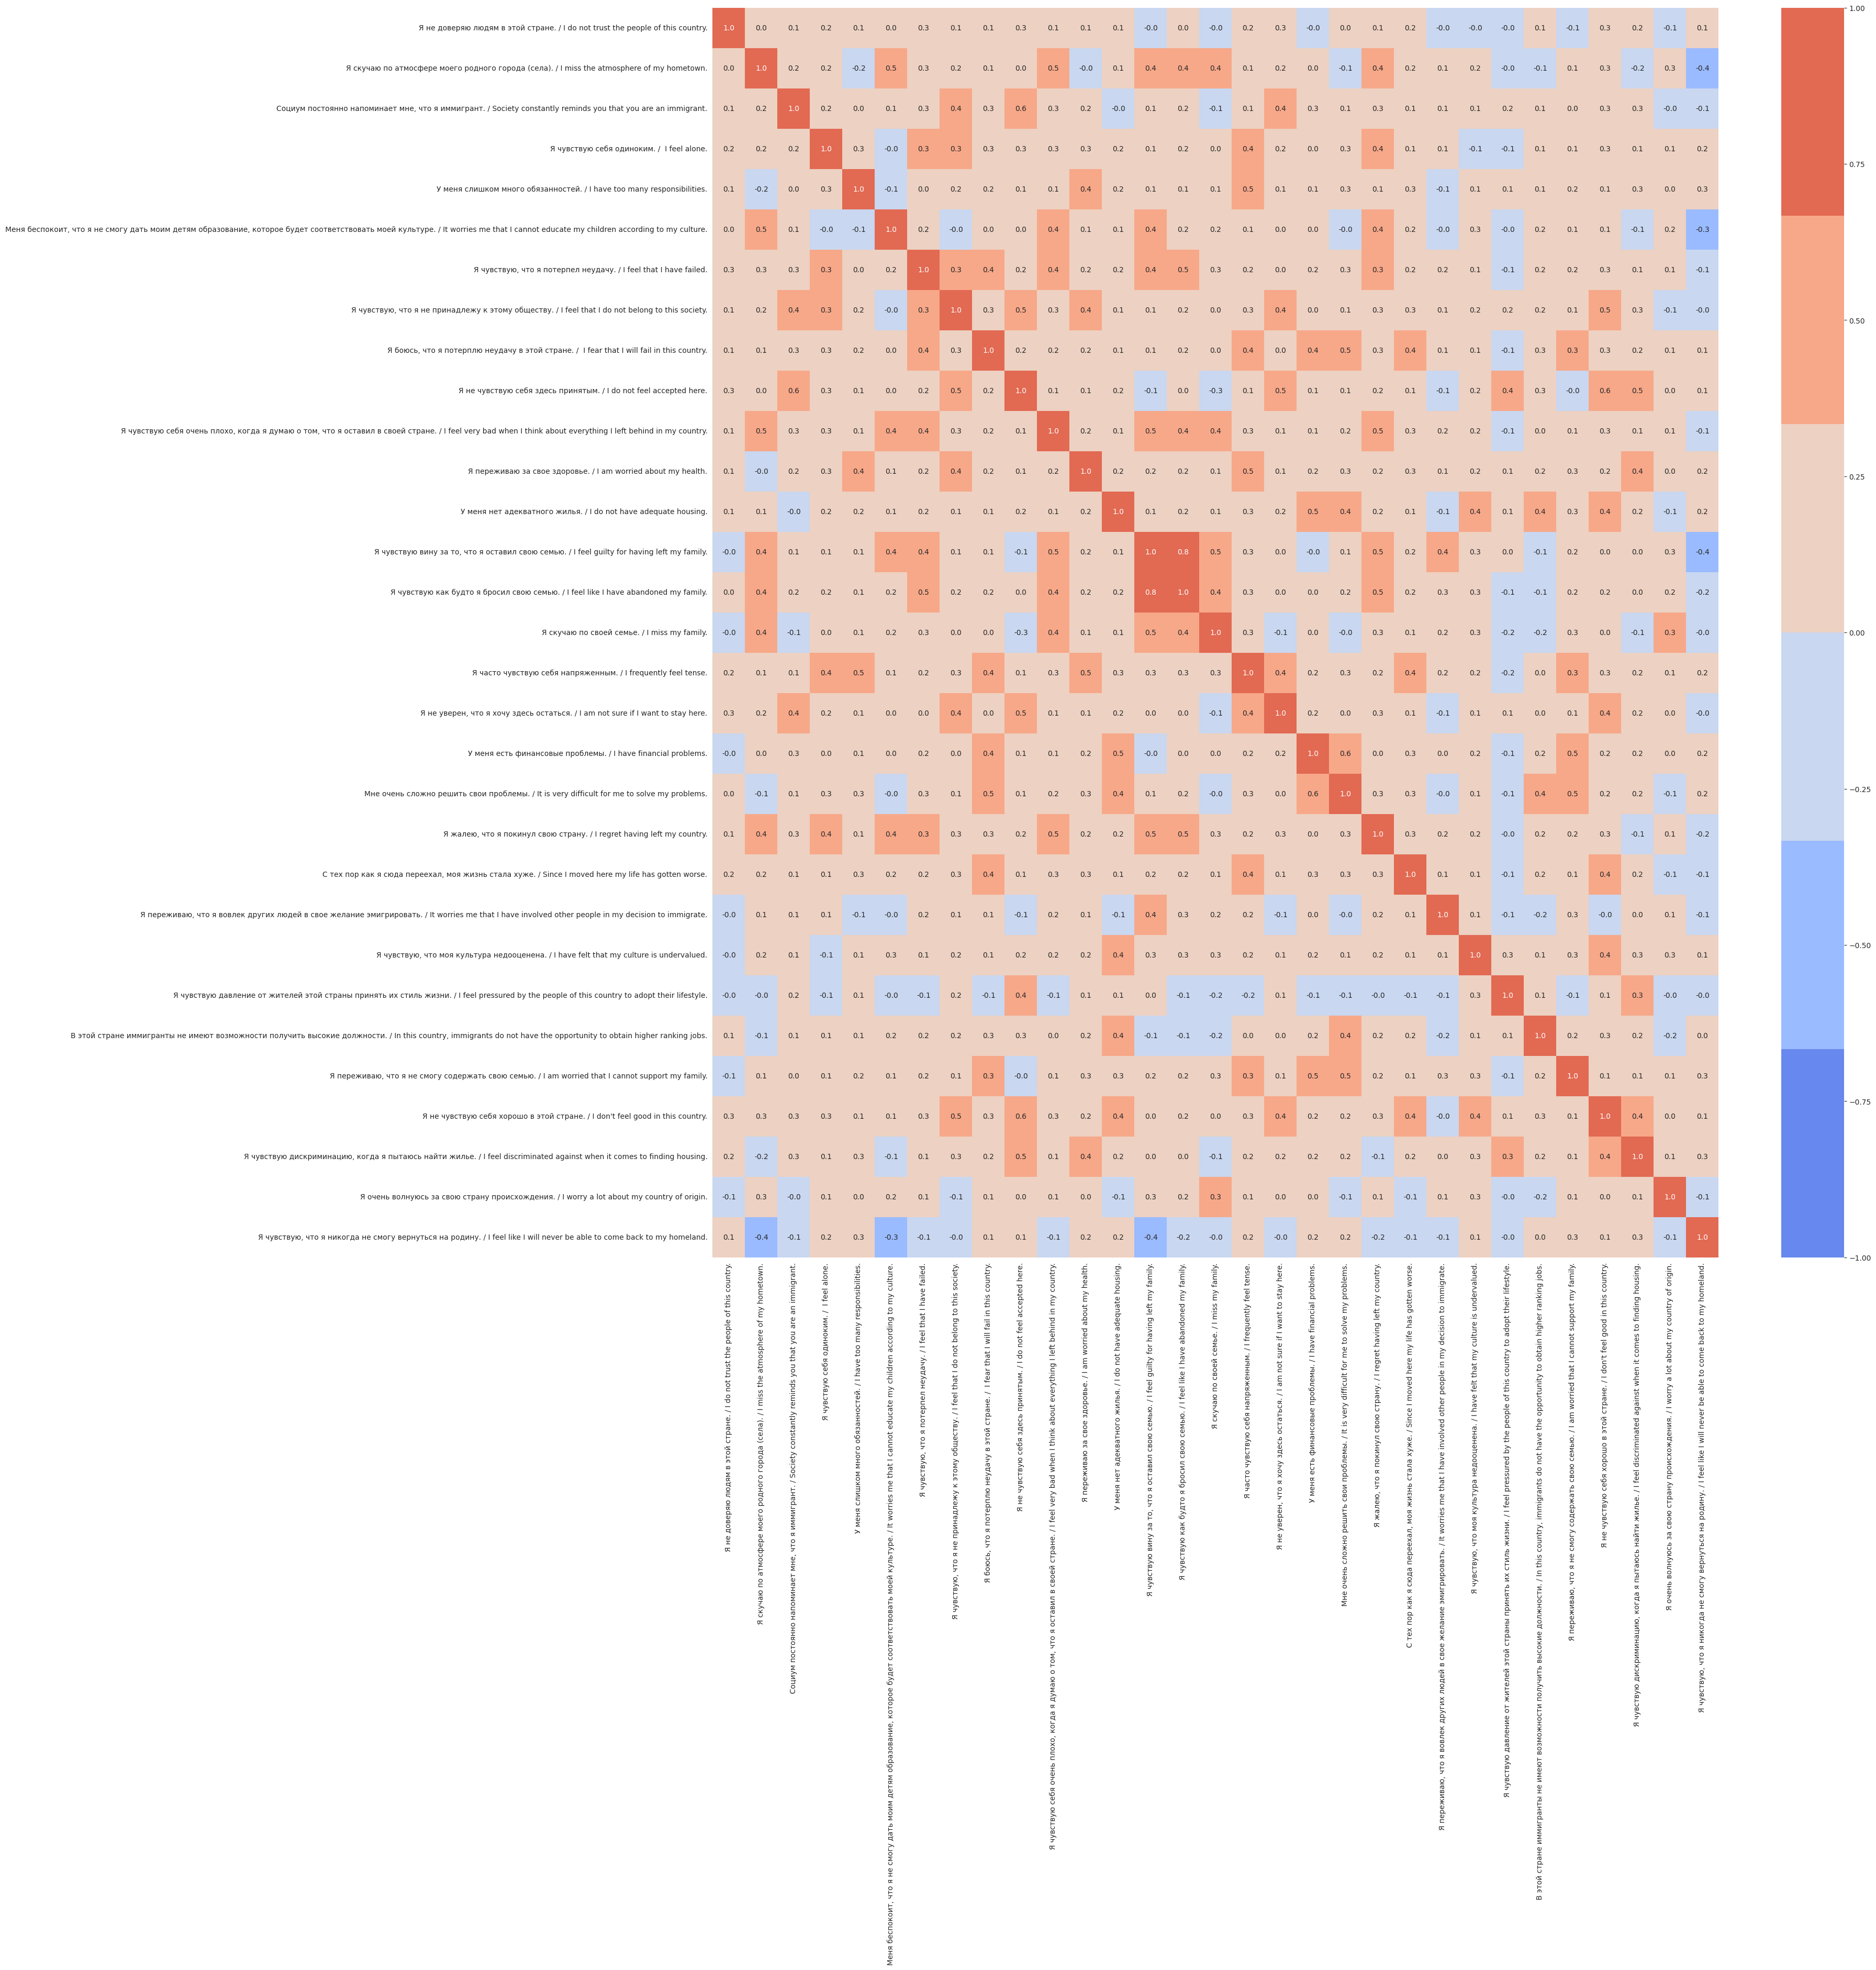

In [7]:
figure(figsize=(31, 31))
heatmap(predictors.corr(), annot=True, fmt='.1f', cmap=color_palette("coolwarm"), vmin=-1, vmax=1)
# set_style('white')

# Data cleaning

In [8]:
# predictors.drop(labels="Я чувствую как будто я бросил свою семью. / I feel like I have abandoned my family. ", axis="columns", inplace=True)

In [9]:
predictors.isna().sum()

Я не доверяю людям в этой стране. / I do not trust the people of this country.                                                                                                         1
Я скучаю по атмосфере моего родного города (села). / I miss the atmosphere of my hometown.                                                                                             1
Социум постоянно напоминает мне, что я иммигрант. / Society constantly reminds you that you are an immigrant.                                                                          1
Я чувствую себя одиноким. /  I feel alone.                                                                                                                                             1
У меня слишком много обязанностей. / I have too many responsibilities.                                                                                                                 1
Меня беспокоит, что я не смогу дать моим детям образование, которое будет с

In [10]:
predictors = predictors.dropna(axis="rows", how="any")
outcome: DataFrame = outcome.dropna(axis="rows", how="any")

In [11]:
outcome: DataFrame = outcome[outcome.index.isin(predictors.index)]
predictors: DataFrame = predictors[predictors.index.isin(outcome.index)]

# Correlation between PTSD level and daily stressors

In [12]:
predictors.corrwith(other=outcome["PTSD"], axis=0, method='pearson', numeric_only=True)

Я не доверяю людям в этой стране. / I do not trust the people of this country.                                                                                                        -0.178478
Я скучаю по атмосфере моего родного города (села). / I miss the atmosphere of my hometown.                                                                                            -0.074513
Социум постоянно напоминает мне, что я иммигрант. / Society constantly reminds you that you are an immigrant.                                                                         -0.028902
Я чувствую себя одиноким. /  I feel alone.                                                                                                                                            -0.373182
У меня слишком много обязанностей. / I have too many responsibilities.                                                                                                                -0.403897
Меня беспокоит, что я не смогу дать моим

In [13]:
predictors.columns

Index(['Я не доверяю людям в этой стране. / I do not trust the people of this country.',
       'Я скучаю по атмосфере моего родного города (села). / I miss the atmosphere of my hometown.',
       'Социум постоянно напоминает мне, что я иммигрант. / Society constantly reminds you that you are an immigrant.',
       'Я чувствую себя одиноким. /  I feel alone.',
       'У меня слишком много обязанностей. / I have too many responsibilities.',
       'Меня беспокоит, что я не смогу дать моим детям образование, которое будет соответствовать моей культуре. / It worries me that I cannot educate my children according to my culture.',
       'Я чувствую, что я потерпел неудачу. / I feel that I have failed.',
       'Я чувствую, что я не принадлежу к этому обществу. / I feel that I do not belong to this society.',
       'Я боюсь, что я потерплю неудачу в этой стране. /  I fear that I will fail in this country.',
       'Я не чувствую себя здесь принятым. / I do not feel accepted here.',
       

Text(0, 0.5, 'PTSD')

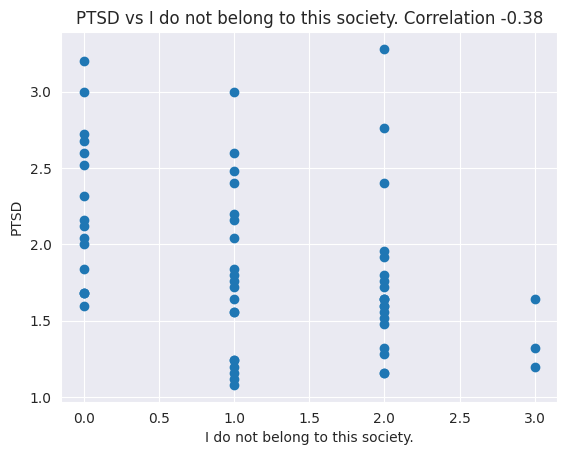

In [14]:
scatter(x=predictors["Я чувствую, что я никогда не смогу вернуться на родину. / I feel like I will never be able to come back to my homeland."],
        y=outcome["PTSD"])
title(f'PTSD vs I do not belong to this society. Correlation {round(outcome.corrwith(predictors["Я чувствую, что я никогда не смогу вернуться на родину. / I feel like I will never be able to come back to my homeland."], axis=0, method="pearson", numeric_only=True)[0], ndigits=2)}')
xlabel('I do not belong to this society.')
ylabel('PTSD')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


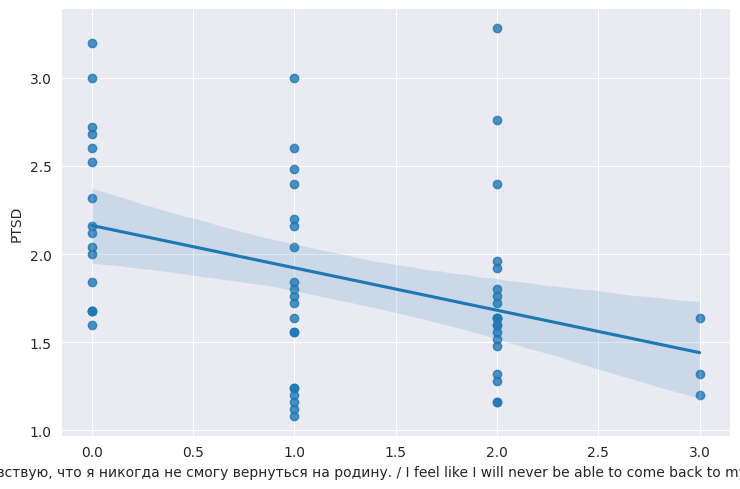

In [15]:
lmplot(x="Я чувствую, что я никогда не смогу вернуться на родину. / I feel like I will never be able to come back to my homeland.",
       y="PTSD",
       data=DataFrame(data={"Я чувствую, что я никогда не смогу вернуться на родину. / I feel like I will never be able to come back to my homeland.": predictors["Я чувствую, что я никогда не смогу вернуться на родину. / I feel like I will never be able to come back to my homeland."],
                            "PTSD": outcome["PTSD"]}),
       height=5,
       aspect=1.5)

In [16]:
# predictors.drop(labels=["Я очень волнуюсь за свою страну происхождения. / I worry a lot about my country of origin.",
#                         "Я чувствую давление от жителей этой страны принять их стиль жизни. / I feel pressured by the people of this country to adopt their lifestyle. ",
#                         "Социум постоянно напоминает мне, что я иммигрант. / Society constantly reminds you that you are an immigrant.",
#                         "Я жалею, что я покинул свою страну. / I regret having left my country. ",
#                         "В этой стране иммигранты не имеют возможности получить высокие должности. / In this country, immigrants do not have the opportunity to obtain higher ranking jobs. ",
#                         "Я скучаю по атмосфере моего родного города (села). / I miss the atmosphere of my hometown. ",
#                         "Я чувствую вину за то, что я оставил свою семью. / I feel guilty for having left my family.",
#                         "Я чувствую себя очень плохо, когда я думаю о том, что я оставил в своей стране. / I feel very bad when I think about everything I left behind in my country. ",
#                         "Я скучаю по своей семье. / I miss my family. ",
#                         "Я переживаю, что я вовлек других людей в свое желание эмигрировать. / It worries me that I have involved other people in my decision to immigrate. ",
#                         "У меня есть финансовые проблемы. / I have financial problems. ",
#                         "Я чувствую, что моя культура недооценена. / I have felt that my culture is undervalued.",
#                         " Я не чувствую себя здесь принятым. / I do not feel accepted here. ",
#                         "Я не доверяю людям в этой стране. / I do not trust the people of this country.",
#                         "Я не уверен, что я хочу здесь остаться. / I am not sure if I want to stay here. ",
#                         "Я боюсь, что я потерплю неудачу в этой стране. /  I fear that I will fail in this country.",
#                         "Я чувствую дискриминацию, когда я пытаюсь найти жилье. / I feel discriminated against when it comes to finding housing.",
#                         "Меня беспокоит, что я не смогу дать моим детям образование, которое будет соответствовать моей культуре. / It worries me that I cannot educate my children according to my culture. "], axis="columns", inplace=True)

In [17]:
predictors.corrwith(other=outcome["PTSD"], axis=0, method='pearson', numeric_only=True)

Я не доверяю людям в этой стране. / I do not trust the people of this country.                                                                                                        -0.178478
Я скучаю по атмосфере моего родного города (села). / I miss the atmosphere of my hometown.                                                                                            -0.074513
Социум постоянно напоминает мне, что я иммигрант. / Society constantly reminds you that you are an immigrant.                                                                         -0.028902
Я чувствую себя одиноким. /  I feel alone.                                                                                                                                            -0.373182
У меня слишком много обязанностей. / I have too many responsibilities.                                                                                                                -0.403897
Меня беспокоит, что я не смогу дать моим

# Multiple Linear Regression

In [18]:

# создаем пустую модель c помощью sklearn.linear_model
linearRegression = LinearRegression()
X=predictors
X.columns = X.columns.str.extract('/(.*)')
y=outcome["PTSD"]
linearRegression.fit(X=X, y=y)

print('Training data R-squared:', linearRegression.score(X=X, y=y))

Training data R-squared: 0.6417765007330392


# statsmodels.regression.linear_model.OLS

In [19]:
# создаем пустую модель c помощью statsmodels
X_incl_const = add_constant(data=X)
model = OLS(endog=y, exog=X_incl_const)
results = model.fit()

In [20]:
print(f"R-squared: {round(results.rsquared, 2)}") # R^2
print(f"F-statistic: {round(results.fvalue, 2)}") # F-статистика
print(f"F-critical: {f.ppf(q=1-0.05, dfn=results.df_model, dfd=results.df_resid)}") # F-критическое
print(f"p-value (F-statistic): {round(results.f_pvalue, 2)}") # p-value (F-статистика)

R-squared: 0.64
F-statistic: 1.56
F-critical: 1.8781725068172355
p-value (F-statistic): 0.12


In [21]:
estimate = results.params.rename('Estimate').to_frame()
ci = results.conf_int(alpha=0.05, cols=None).rename(columns={0: 'LL', 1: 'UL'})
se = results.bse.rename('SE')
p = results.pvalues.rename('p')
p = p[p < 0.20  ]
options.display.float_format = '{:,.2f}'.format
estimate.join(other=[se, ci, p], on=None, how='inner')

,Estimate,SE,LL,UL,p
const,2.95,0.51,1.89,4.00,0.00
"( I have too many responsibilities.,)",-0.19,0.14,-0.47,0.08,0.16
"( I feel that I do not belong to this society.,)",-0.17,0.12,-0.42,0.08,0.18
"( I feel very bad when I think about everything I left behind in my country.,)",0.16,0.10,-0.05,0.37,0.14
"( I regret having left my country.,)",0.39,0.20,-0.02,0.79,0.06
